In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import matplotlib.transforms as mtransforms
import evaluate
import pandas as pd
from scipy.stats import wasserstein_distance as wass
import pickle as pkl
from evaluate import load
import random

import torch
import nltk
import evaluate
import multiprocessing
nltk.download('punkt')
from torch.utils.data import DataLoader, Dataset
import numpy as np
from tqdm import tqdm
import pandas as pd
from nltk import sent_tokenize
import math, re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from datasets import load_dataset, DatasetDict, load_from_disk
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import Trainer, TrainingArguments, pipeline
import argparse
import pickle as pkl
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
from evaluate import load
import random
from statistics import mean 
import os
from natsort import natsorted

[nltk_data] Downloading package punkt to /home/haskari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def get_bad_indice(name,model):
    if name=='cnn':
        with open('../rebuttal_experiments/Non-important-paraphrase/cnn.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        ### For 10% sample

        # random.seed(42)
        # ten_percent=int(len(paraphrased_summaries)*0.115)
        # # print(ten_percent)
        # random_indices = random.sample(range(len(paraphrased_summaries)), ten_percent)
        # random_indices.sort()
        
        # new_para=[]
        # for k,v in enumerate(paraphrased_summaries):
        #     if k in random_indices:
        #         new_para.append(v)
            
        
    elif name=='xsum':
        with open('../rebuttal_experiments/Top3-Paraphrase/xsum_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        
        # random.seed(42)
        # ten_percent=int(len(paraphrased_summaries)*0.115)
        # # print(ten_percent)
        # random_indices = random.sample(range(len(paraphrased_summaries)), ten_percent)
        # random_indices.sort()
        
        # new_para=[]
        # for k,v in enumerate(paraphrased_summaries):
        #     if k in random_indices:
        #         new_para.append(v)
        
    elif name=='news':
        with open('../rebuttal_experiments/Top3-Paraphrase/news_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        
        # random.seed(42)
        # ten_percent=int(len(paraphrased_summaries)*0.115)
        # # print(ten_percent)
        # random_indices = random.sample(range(len(paraphrased_summaries)), ten_percent)
        # random_indices.sort()
        
        # new_para=[]
        # for k,v in enumerate(paraphrased_summaries):
        #     if k in random_indices:
        #         new_para.append(v)
    
    else:
        with open('../rebuttal_experiments/Non-important-paraphrase/reddit_capped_random.pkl'.format(model), 'rb') as f:
            paraphrased_summaries=pkl.load(f)
        
        # random.seed(42)
        # ten_percent=int(len(paraphrased_summaries)*0.115)
        # # print(ten_percent)
        # random_indices = random.sample(range(len(paraphrased_summaries)), ten_percent)
        # random_indices.sort()
        
        # new_para=[]
        # for k,v in enumerate(paraphrased_summaries):
        #     if k in random_indices:
        #         new_para.append(v)

        
    bad_index=[]
    for idx,sum in enumerate(paraphrased_summaries):
        if sum == []:
            bad_index.append(idx)
    return bad_index

In [21]:
#LOADING MODELS

In [16]:
#new paraphrased llama
np_data_llama_cnn = datasets.load_from_disk("/nas02/Hadi/Position-Bias-LLMs/pegasus/saved_models/pegasus-reddit-reddit-paraphrase")

np_data_bart_cnn = datasets.load_from_disk("/nas02/Hadi/Position-Bias-LLMs/bart/saved_models/BART-reddit-reddit-paraphrase")

# np_data_llama_xsum = datasets.load_from_disk("../llama2/saved_models/top3-random-para-LlaMa2-xsum/")

# np_data_llama_news = datasets.load_from_disk("../llama2/saved_models/top3-random-para-LlaMa2-news/")

# np_data_llama_reddit = datasets.load_from_disk("../llama2/saved_models/non-important-random-para-LlaMa2-reddit/")






#old paraphrased llama


p_data_llama_cnn = datasets.load_from_disk("../llama2/saved_models/non-important-rel-para-LlaMa2-cnn/")

bad_index=get_bad_indice('cnn','llama2')
p_data_llama_cnn=p_data_llama_cnn.select(i for i in range(len(p_data_llama_cnn)) 
                 if i not in set(bad_index))



p_data_llama_xsum = datasets.load_from_disk("../llama2/saved_models/top3-rele-para-LlaMa2-xsum/")

bad_index=get_bad_indice('xsum','llama2')
p_data_llama_xsum=p_data_llama_xsum.select(i for i in range(len(p_data_llama_xsum)) 
                 if i not in set(bad_index))


p_data_llama_news = datasets.load_from_disk("../llama2/saved_models/top3-rele-para-LlaMa2-news/")

bad_index=get_bad_indice('news','llama2')
p_data_llama_news=p_data_llama_news.select(i for i in range(len(p_data_llama_news)) 
                 if i not in set(bad_index))


p_data_llama_reddit = datasets.load_from_disk("../llama2/saved_models/non-important-rel-para-LlaMa2-reddit/")

bad_index=get_bad_indice('reddit','llama2')
p_data_llama_reddit=p_data_llama_reddit.select(i for i in range(len(p_data_llama_reddit)) 
                 if i not in set(bad_index))





#original llama


data_llama_cnn = datasets.load_from_disk("../llama2/saved_models/non-important-original-LlaMa2-cnn/")

bad_index=get_bad_indice('cnn','llama2')
data_llama_cnn=data_llama_cnn.select(i for i in range(len(data_llama_cnn)) 
                 if i not in set(bad_index))



data_llama_xsum = datasets.load_from_disk("../llama2/saved_models/top3-original-LlaMa2-xsum/")

bad_index=get_bad_indice('xsum','llama2')
data_llama_xsum=data_llama_xsum.select(i for i in range(len(data_llama_xsum)) 
                 if i not in set(bad_index))


data_llama_news = datasets.load_from_disk("../llama2/saved_models/top3-original-LlaMa2-news/")

bad_index=get_bad_indice('news','llama2')
data_llama_news=data_llama_news.select(i for i in range(len(data_llama_news)) 
                 if i not in set(bad_index))


data_llama_reddit = datasets.load_from_disk("../llama2/saved_models/non-important-original-LlaMa2-reddit/")

bad_index=get_bad_indice('reddit','llama2')
data_llama_reddit=data_llama_reddit.select(i for i in range(len(data_llama_reddit)) 
                 if i not in set(bad_index))





NameError: name 'get_bad_indice' is not defined

In [12]:
np_data_llama_cnn = datasets.load_from_disk("/nas02/Hadi/Position-Bias-LLMs/pegasus/saved_models/pegasus-reddit-reddit-paraphrase")
np_data_llama_cnn

Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 4175
})

In [17]:
np_data_bart_cnn = datasets.load_from_disk("/nas02/Hadi/Position-Bias-LLMs/bart/saved_models/BART-reddit-reddit-paraphrase")
np_data_bart_cnn

Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 4175
})

In [23]:
dataset = load_dataset('reddit_tifu', 'long')
    
pkls=os.listdir('/nas02/Hadi/Relevance-Paraphrasing/paraphrased_articles/reddit')
pkls=natsorted(pkls)
pkls_list=[]
count=0
for pikl in pkls:
    with open('/nas02/Hadi/Relevance-Paraphrasing/paraphrased_articles/reddit/{}'.format(pikl),'rb') as f:
        file=pkl.load(f)
    if not file:
        count+=1
        file.append(' ') #no paraphrasing possible
    pkls_list.extend(file)

article_key = 'documents'
summary_key = 'tldr'
# 80% train, 20% test + validation
train_testvalid = dataset['train'].train_test_split(test_size=0.2, seed=42)
# Split the 20% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.5, seed=42)
# gather everyone if you want to have a single DatasetDict
dataset = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'validation': test_valid['train']})


data=dataset['test']
data = data.remove_columns(article_key).add_column(article_key, pkls_list).cast(data.features)
bad_index=[]
for idx,summ in enumerate(pkls_list):
    if summ == ' ':
        bad_index.append(idx)

    # print("Bad Indices")
    # print(len(bad_index))



    # for i in range(len(bad_index)):
    #     pkls_list.pop(bad_index[i] - i)

    # print(len(pkls_list))


data=data.select(i for i in range(len(data)) 
                if i not in set(bad_index))
print(data)

/home/haskari/miniconda3/envs/paraphrase/lib/python3.12/site-packages/datasets/load.py:1461: FutureWarning: The repository for reddit_tifu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/reddit_tifu
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title'],
    num_rows: 3459
})


In [30]:
dataset = load_dataset("cnn_dailymail", '3.0.0')

pkls=os.listdir('/nas02/Hadi/Relevance-Paraphrasing/paraphrased_articles/cnn')
pkls=natsorted(pkls)
pkls_list=[]
count=0
for pikl in pkls:
    with open('/nas02/Hadi/Relevance-Paraphrasing/paraphrased_articles/cnn/{}'.format(pikl),'rb') as f:
        file=pkl.load(f)
    if not file:
        count+=1
        file.append(' ') #no paraphrasing possible
    pkls_list.extend(file)

article_key = 'article'
summary_key = 'highlights'
name='cnn_dailymail'

data=dataset['test']
data = data.remove_columns(article_key).add_column(article_key, pkls_list).cast(data.features)
#data[article_key]=pkls_list
print(data)
bad_index=[]
for idx,summ in enumerate(pkls_list):
    if summ == ' ':
        bad_index.append(idx)

    # print("Bad Indices")
    # print(len(bad_index))



    # for i in range(len(bad_index)):
    #     pkls_list.pop(bad_index[i] - i)

    # print(len(pkls_list))
print(len(bad_index))

data=data.select(i for i in range(len(data)) 
                if i not in set(bad_index))
print(data)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 11490
})
539
Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 10951
})


In [25]:
len(pkls_list)

4214

In [28]:
set(bad_index[0:10])

{1, 2, 4, 5, 10, 12, 20, 24, 33, 39}

In [19]:
np_data_bart_cnn['article']

[['well this was around 9 years ago when i was a 2nd grader.',
  'so basically it was some kids birthday and since it was primary school most kids brought cupcakes and the teacher would pass it out to the class.',
  'me being the hungry little shit that i was i was desperately in the mood for some vanilla cupcakes but the teacher decided to pass out the chocolate ones first.',
  'after she had finished passing out the chocolate ones she picks up the vanilla ones and says, "raise your hand if you want vanilla!".',
  'at that moment i was talking to a friend and it took me a bit to process the fact that she just asked who wanted vanilla.',
  'I reached up and found the cupcakes were conveniently located just above me.',
  'I accidentally knocked the cupcakes out of her hand, causing them to spill all over her.',
  'she got bat-shit angry and begins to make a scene in the middle of the whole cafeteria.',
  'she explained how i "ruined her brand new shoes" and the bitch even asked me if i 

In [18]:
np_data_bart_cnn['model_summaries']

[['** i wanted vanilla cupcakes, accidentally knocked them out of my teachers hand, made her mad, and ruined her shoes.'],
 ['story as old as time (or at least airplanes).',
  'guy sits next to cute girl on plane.',
  'waits until plane lands to talk to her.',
  'end up having nice, but short conversation.',
  "guy doesn't ask for number or anything afterwards.",
  'etc etc.'],
 ['story as old as time (or at least airplanes).',
  'guy sits next to cute girl on plane.',
  'waits until plane lands to talk to her.',
  'end up having nice, but short conversation.',
  "guy doesn't ask for number or anything afterwards.",
  'etc etc.'],
 ['story as old as time (or at least airplanes).',
  'guy sits next to cute girl on plane.',
  'waits until plane lands to talk to her.',
  'end up having nice, but short conversation.',
  "guy doesn't ask for number or anything afterwards.",
  'etc etc.'],
 ['spent four months studying abroad in costa rica and got lost several times.',
  'one night i was afr

In [14]:
np_data_llama_cnn['article']

[['well this was around 9 years ago when i was a 2nd grader.',
  'so basically it was some kids birthday and since it was primary school most kids brought cupcakes and the teacher would pass it out to the class.',
  'me being the hungry little shit that i was i was desperately in the mood for some vanilla cupcakes but the teacher decided to pass out the chocolate ones first.',
  'after she had finished passing out the chocolate ones she picks up the vanilla ones and says, "raise your hand if you want vanilla!".',
  'at that moment i was talking to a friend and it took me a bit to process the fact that she just asked who wanted vanilla.',
  'I reached up and found the cupcakes were conveniently located just above me.',
  'I accidentally knocked the cupcakes out of her hand, causing them to spill all over her.',
  'she got bat-shit angry and begins to make a scene in the middle of the whole cafeteria.',
  'she explained how i "ruined her brand new shoes" and the bitch even asked me if i 

In [13]:
np_data_llama_cnn['model_summaries']

[["i wanted vanilla cupcakes and knocked them out of the teacher's hand causing them to spill all over her and make a scene in the school cafeteria.",
  '**'],
 [],
 [],
 [],
 ["i went to chinatown in san jose and couldn't remember where i was supposed to go, so i walked in circles for an hour and a half."],
 ['threw a tray of fries at a cloud of seagulls, they all laughed at me and i ended up hitting a cloud of seagulls in the process.'],
 [],
 ['i met a girl at hong kong departures terminal.',
  'she was making her way to an auckland, new zealand gate before i lost track of her and stopped pretending to ignore.',
  'she was making her way to an auckland, new zealand gate.',
  'i am writing this on the runway of a 2 hour delay on what’s to be a 13 hour flight feeling like a made a life mistake.'],
 ['i fucked up by trying to help a drunk woman back to her dorm and losing my best friend because of it.',
  "i'm a dumbass."],
 ["don't be a designated driver, don't back up your van, and d

In [70]:
p_data_llama_reddit

Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 1487
})

In [71]:
np_data_llama_reddit

Dataset({
    features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title', 'original_article', 'article', 'highlights', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 1815
})

In [2]:
# #Loading CSV's

#paraphrased llama csv
original_bart_cnn_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-cnn-cnn.csv")

original_bart_xsum_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-xsum-xsum.csv")

original_bart_news_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-news-news.csv")

original_bart_reddit_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-reddit-reddit.csv")

#paraphrased llama csv
paraphrased_bart_cnn_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-cnn-cnn-paraphrase.csv")

paraphrased_bart_xsum_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-xsum-xsum-paraphrase.csv")

paraphrased_bart_news_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-news-news-paraphrase.csv")

paraphrased_bart_reddit_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/bart/results/BART-reddit-reddit-paraphrase.csv")


original_pegasus_cnn_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-cnn-cnn.csv")

original_pegasus_xsum_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-xsum-xsum.csv")

original_pegasus_news_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-news-news.csv")

original_pegasus_reddit_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-reddit-reddit.csv")

#paraphrased llama csv
paraphrased_pegasus_cnn_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-cnn-cnn-paraphrase.csv")

paraphrased_pegasus_xsum_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-xsum-xsum-paraphrase.csv")

paraphrased_pegasus_news_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-news-news-paraphrase.csv")

paraphrased_pegasus_reddit_csv = pd.read_csv("/nas02/Hadi/Position-Bias-LLMs/pegasus/results/pegasus-reddit-reddit-paraphrase.csv")



In [73]:
def get_lines_modified(data):
    cumm_list1 = [0]*10
    #cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
        
    #     y2 = da['mapping']
    # #     print(y)
    #     cumm_list2 = [a*b for a,b in zip(cumm_list2, y2)]
    return cumm_list1

In [48]:
def get_wass(data):

    cumm_list1 = [0]*10
    cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
        y2 = da['mapping']
    #     print(y)
        cumm_list2 = [a+b for a,b in zip(cumm_list2, y2)]
   
    wasse=wass(np.array(cumm_list1)/np.sum(cumm_list1), np.array(cumm_list2)/np.sum(cumm_list2))
    return wasse

In [49]:
print(get_wass(data_llama_xsum))
print(get_wass(p_data_llama_xsum))
print(get_wass(np_data_llama_xsum))

0.10988959253156344
0.10269916134206514
0.10278909681149989


In [50]:
print(get_wass(data_llama_news))
print(get_wass(p_data_llama_news))
print(get_wass(np_data_llama_news))

0.028989737625723672
0.02518607746473637
0.027420714192693936


In [34]:
get_lines_modified(data_llama_xsum)

[1430, 234, 99, 63, 43, 25, 20, 19, 12, 13]

In [35]:
get_lines_modified(p_data_llama_xsum)

[1349, 237, 120, 72, 47, 38, 23, 23, 15, 16]

In [36]:
get_lines_modified(np_data_llama_xsum)

[1361, 235, 111, 73, 51, 42, 31, 18, 21, 16]

In [33]:
get_lines_modified(data_llama_news)

[743, 53, 18, 6, 8, 9, 3, 1, 3, 1]

In [32]:
get_lines_modified(p_data_llama_news)

[757, 68, 24, 9, 7, 7, 1, 3, 1, 2]

In [30]:
get_lines_modified(np_data_llama_news)

[766, 58, 19, 14, 9, 3, 4, 4, 0, 2]


[766, 58, 19, 14, 9, 3, 4, 4, 0, 2]

In [60]:
def get_bertscore(data):
    
    highlights = []
    model_s = []


    for j in data['highlights']:
        highlights.append(' '.join(j))

    for k in data['model_summaries']:
        model_s.append(' '.join(k))
    
    bertscore = load("bertscore")
    
    results = bertscore.compute(predictions=model_s, references=highlights, lang="en", device='cuda:2')
    mean_precision=sum(results['precision'])/len(results['precision'])
    mean_recall=sum(results['recall'])/len(results['recall'])
    mean_f1=sum(results['f1'])/len(results['f1'])
    
    return mean_f1
  

In [63]:
get_bertscore(data_llama_news)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.8732177867089481

In [62]:
get_bertscore(np_data_llama_news)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.8739884772981175

In [61]:
get_bertscore(p_data_llama_news)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.8740500824101138

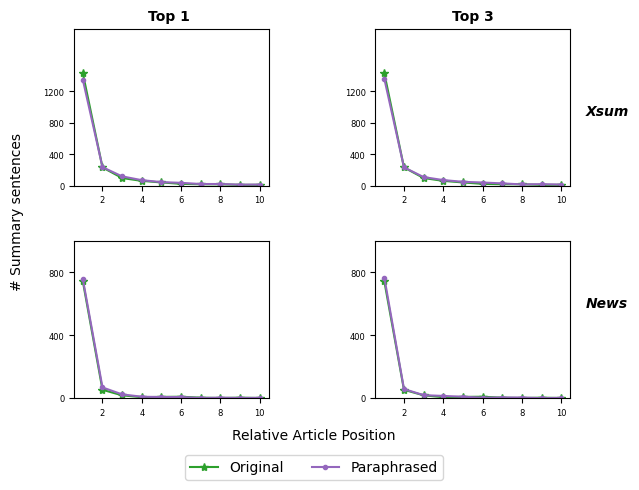

In [21]:
markers=[0,1,2,3,4,5,6,7,8,9]
x = [j for j in range(1,11)]
even_xticks = np.arange(2, 11, 2)

# cnn_ticks=[0,666,1332,2000]
xsum_ticks=[0,400,800,1200]
news_ticks=[0,400,800,1200]
# reddit_ticks=[0,50,100,150]


fig, axs = plt.subplots(2, 2) #,sharey=True)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

cumm_list1=get_lines_modified(data_llama_xsum)
cumm_list2=get_lines_modified(p_data_llama_xsum)
axs[0, 0].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[0, 0].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
axs[0, 0].set_title('Top 1 ',fontsize = 10,weight='bold')
axs[0, 0].set_xticks(even_xticks)
axs[0, 0].set_xticklabels(even_xticks, fontsize=6)
axs[0, 0].set_yticks(xsum_ticks)
axs[0, 0].set_yticklabels(xsum_ticks, fontsize=6)
axs[0, 0].set_ylim([0, 2000])


cumm_list1=get_lines_modified(data_llama_xsum)
cumm_list2=get_lines_modified(np_data_llama_xsum)
axs[0, 1].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[0, 1].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
axs[0, 1].set_title('Top 3',fontsize = 10,weight='bold')
axs[0, 1].set_xticks(even_xticks)
axs[0, 1].set_xticklabels(even_xticks, fontsize=6)
axs[0, 1].set_yticks(xsum_ticks)
axs[0, 1].set_yticklabels(xsum_ticks, fontsize=6)
axs[0, 1].set_ylim([0, 2000])

cumm_list1=get_lines_modified(data_llama_news)
cumm_list2=get_lines_modified(p_data_llama_news)
axs[1, 0].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[1, 0].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[1, 0].set_title('Top 3',fontsize = 10,weight='bold')
axs[1, 0].set_xticks(even_xticks)
axs[1, 0].set_xticklabels(even_xticks, fontsize=6)
axs[1, 0].set_yticks(news_ticks)
axs[1, 0].set_yticklabels(news_ticks, fontsize=6)
axs[1, 0].set_ylim([0, 1000])


cumm_list1=get_lines_modified(data_llama_news)
cumm_list2=get_lines_modified(np_data_llama_news)
axs[1, 1].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[1, 1].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[3,4].set_title('REDDIT-LlaMa',fontsize = 10)
axs[1, 1].set_xticks(even_xticks)
axs[1, 1].set_xticklabels(even_xticks, fontsize=6)
axs[1, 1].set_yticks(news_ticks)
axs[1, 1].set_yticklabels(news_ticks, fontsize=6)
axs[1, 1].set_ylim([0, 1000])
handles, labels = axs[1, 1].get_legend_handles_labels()

# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

fig.text(0.5, 0.025, 'Relative Article Position', ha='center')
fig.text(0.025, 0.5, '# Summary sentences', va='center', rotation='vertical')
    
# for ax in axs.flat:
#     ax.label_outer()

# plt.gcf().text(0.925, 0.8, "CNN", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.7, "Xsum", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.3, "News", fontsize=10,style='italic',weight='bold')
# plt.gcf().text(0.925, 0.2, "Reddit", fontsize=10,style='italic',weight='bold')


fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
#fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)
fig.subplots_adjust(hspace=0.35, wspace=0.55)

#plt.savefig('../figures/final/results_with_all_axis_temp0.png',bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
#paper table

In [53]:
def get_rouge1(data):

    highlights = []
    model_s = []


    for j in data['highlights']:
        highlights.append(' '.join(j))

    for k in data['model_summaries']:
        model_s.append(' '.join(k))


    rouge = evaluate.load('rouge')

    print("==> Comparing generated summaries with gold summaries")
    results = rouge.compute(predictions=model_s, references=highlights)
    
    return results

In [3]:
def get_change(new,old):
    return ((new-old)/old)*100

In [55]:
data_llama_xsum_csv

Unnamed: 0    rouge1   rouge2   rougeL  rougeLsum  Bertscore
0           0  0.259658  0.07298  0.19184   0.191791    0.87196

In [10]:
#llama xsum

rouge1_new=paraphrased_pegasus_xsum_csv
rouge1_old=original_pegasus_xsum_csv
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

# Bert_new=p_data_llama_reddit_csv['Bertscore']
# Bert_old=data_llama_reddit_csv['Bertscore']
Bertscore=get_change(rouge1_new['Bertscore'],rouge1_old['Bertscore'])
print('Bertscore')
print(Bertscore)

######

# rouge1_new=np_data_llama_reddit_csv
# rouge1_old=data_llama_reddit_csv
# rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
# print('rouge1')
# print(rouge1_cnn_change)

# rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
# print('rouge2')
# print(rouge2_cnn_change)

# rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
# print('rougeL')
# print(rougeL_cnn_change)

# Bert_new=np_data_llama_reddit_csv['Bertscore']
# Bert_old=data_llama_reddit_csv['Bertscore']
# Bertscore=get_change(Bert_new,Bert_old)
# print('Bertscore')
# print(Bertscore)

# #llama news

# rouge1_new=get_rouge1(p_data_llama_xsum)
# rouge1_old=get_rouge1(data_llama_xsum)
# rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
# print('rouge1')
# print(rouge1_cnn_change)

# rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
# print('rouge2')
# print(rouge2_cnn_change)

# rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
# print('rougeL')
# print(rougeL_cnn_change)

# Bert_new=p_data_llama_xsum_csv['Bertscore']
# Bert_old=data_llama_xsum_csv['Bertscore']
# Bertscore=get_change(Bert_new,Bert_old)
# print('Bertscore')
# print(Bertscore)

# #llama news

# rouge1_new=get_rouge1(p_data_llama_news)
# rouge1_old=get_rouge1(data_llama_news)
# rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
# print('rouge1')
# print(rouge1_cnn_change)

# rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
# print('rouge2')
# print(rouge2_cnn_change)

# rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
# print('rougeL')
# print(rougeL_cnn_change)

# Bert_new=p_data_llama_news_csv['Bertscore']
# Bert_old=data_llama_news_csv['Bertscore']
# Bertscore=get_change(Bert_new,Bert_old)
# print('Bertscore')
# print(Bertscore)

# #llama reddit

# rouge1_new=get_rouge1(p_data_llama_reddit)
# rouge1_old=get_rouge1(data_llama_reddit)
# rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
# print('rouge1')
# print(rouge1_cnn_change)

# rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
# print('rouge2')
# print(rouge2_cnn_change)

# rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
# print('rougeL')
# print(rougeL_cnn_change)

# Bert_new=p_data_llama_reddit_csv['Bertscore']
# Bert_old=data_llama_reddit_csv['Bertscore']
# Bertscore=get_change(Bert_new,Bert_old)
# print('Bertscore')
# print(Bertscore)


rouge1
0   -2.978322
Name: rouge1, dtype: float64
rouge2
0   -4.835503
Name: rouge2, dtype: float64
rougeL
0   -3.138576
Name: rougeL, dtype: float64
Bertscore
0   -0.218207
Name: Bertscore, dtype: float64


In [37]:
#llama cnn

rouge1_new=get_rouge1(p_data_gpt_cnn)
rouge1_old=get_rouge1(data_gpt_cnn)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_cnn_csv['Bertscore']
Bert_old=data_gpt_cnn_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama xsum

rouge1_new=get_rouge1(p_data_gpt_xsum)
rouge1_old=get_rouge1(data_gpt_xsum)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_xsum_csv['Bertscore']
Bert_old=data_gpt_xsum_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama news

rouge1_new=get_rouge1(p_data_gpt_news)
rouge1_old=get_rouge1(data_gpt_news)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_news_csv['Bertscore']
Bert_old=data_gpt_news_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama reddit

rouge1_new=get_rouge1(p_data_gpt_reddit)
rouge1_old=get_rouge1(data_gpt_reddit)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_reddit_csv['Bertscore']
Bert_old=data_gpt_reddit_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)


==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-5.740015168442588
rouge2
-14.737553887644895
rougeL
-7.0338491785842825
Bertscore
0   -0.230994
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-3.448005251103835
rouge2
-8.361479510372343
rougeL
-3.298379454315739
Bertscore
0   -0.124803
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-2.876136426442941
rouge2
-17.789008947933098
rougeL
-4.334956240594462
Bertscore
0    0.458914
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-1.9922202857055273
rouge2
-9.87998336924011
rougeL
-4.075340569028601
Bertscore
0   -0.102331
Name: Bertscore, dtype: float64


In [38]:
#llama cnn

rouge1_new=get_rouge1(p_data_dolly_cnn)
rouge1_old=get_rouge1(data_dolly_cnn)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_cnn_csv['Bertscore']
Bert_old=data_dolly_cnn_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama xsum

rouge1_new=get_rouge1(p_data_dolly_xsum)
rouge1_old=get_rouge1(data_dolly_xsum)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_xsum_csv['Bertscore']
Bert_old=data_dolly_xsum_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama news

rouge1_new=get_rouge1(p_data_dolly_news)
rouge1_old=get_rouge1(data_dolly_news)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_news_csv['Bertscore']
Bert_old=data_dolly_news_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama reddit

rouge1_new=get_rouge1(p_data_dolly_reddit)
rouge1_old=get_rouge1(data_dolly_reddit)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_reddit_csv['Bertscore']
Bert_old=data_dolly_reddit_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)


==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-10.450472039755992
rouge2
-28.123193070411396
rougeL
-13.902592570894267
Bertscore
0   -0.353591
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-0.6370974361950915
rouge2
-4.547851275344753
rougeL
-1.4202412706339473
Bertscore
0   -1.751434
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-19.37194219006005
rouge2
-40.93095673701666
rougeL
-22.170454119117203
Bertscore
0   -0.331095
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-23.870106888873888
rouge2
-41.31499211996214
rougeL
-25.820053361001367
Bertscore
0   -22.332188
Name: Bertscore, dtype: float64


In [40]:
#llama cnn

rouge1_new=get_rouge1(p_data_mistral_cnn)
rouge1_old=get_rouge1(data_mistral_cnn)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_cnn_csv['Bertscore']
Bert_old=data_mistral_cnn_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama xsum

rouge1_new=get_rouge1(p_data_mistral_xsum)
rouge1_old=get_rouge1(data_mistral_xsum)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_xsum_csv['Bertscore']
Bert_old=data_mistral_xsum_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama news

rouge1_new=get_rouge1(p_data_mistral_news)
rouge1_old=get_rouge1(data_mistral_news)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_news_csv['Bertscore']
Bert_old=data_mistral_news_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)

#llama reddit

rouge1_new=get_rouge1(p_data_mistral_reddit)
rouge1_old=get_rouge1(data_mistral_reddit)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_reddit_csv['Bertscore']
Bert_old=data_mistral_reddit_csv['Bertscore']
Bertscore=get_change(Bert_new,Bert_old)
print('Bertscore')
print(Bertscore)


==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-10.370353587621354
rouge2
-28.322592314312917
rougeL
-14.326284811728582
Bertscore
0   -0.37309
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
1.7025426193088908
rouge2
1.4136689127586441
rougeL
1.3238107153433698
Bertscore
0    0.217558
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-11.3829519761059
rouge2
-34.025530903618176
rougeL
-15.593314984394505
Bertscore
0   -0.192994
Name: Bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-6.461080537097638
rouge2
-25.443573890751164
rougeL
-6.445129940853571
Bertscore
0   -0.053004
Name: Bertscore, dtype: float64


In [ ]:
#Paper bar charts

==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summ

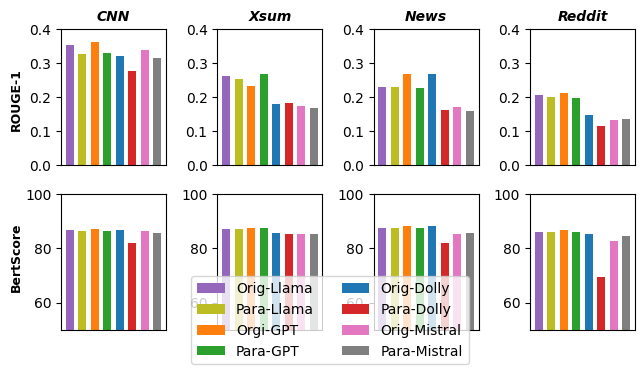

In [16]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

#Rouge1

x=['Orig-Llama', 'Para-Llama', 'Orgi-GPT', 'Para-GPT', 'Orig-Dolly', 'Para-Dolly', 'Orig-Mistral', 'Para-Mistral']
values=[]
values2=[]
valuesL=[]

orig=get_rouge1(data_llama_cnn)
para=get_rouge1(p_data_llama_cnn)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_cnn)
para=get_rouge1(p_data_gpt_cnn)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_cnn)
para=get_rouge1(p_data_dolly_cnn)
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

values.append(orig['rouge1'])
values.append(para['rouge1'])
orig=get_rouge1(data_mistral_cnn)
para=get_rouge1(p_data_mistral_cnn)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

with open('rouge1-cnn.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-cnn.pkl','wb') as f:
    pkl.dump(values2,f)
    
with open('rougeL-cnn.pkl','wb') as f:
    pkl.dump(valuesL,f)

axs[0,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,0].set_ylim(0,0.4)
axs[0,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])


values=[]
values2=[]
valuesL=[]

orig=get_rouge1(data_llama_xsum)
para=get_rouge1(p_data_llama_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_xsum)
para=get_rouge1(p_data_gpt_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_xsum)
para=get_rouge1(p_data_dolly_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_mistral_xsum)
para=get_rouge1(p_data_mistral_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])


with open('rouge1-xsum.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-xsum.pkl','wb') as f:
    pkl.dump(values2,f)

with open('rougeL-xsum.pkl','wb') as f:
    pkl.dump(valuesL,f)

    
axs[0,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,1].set_ylim(0,0.4)
axs[0,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])


values=[]
values2=[]
valuesL=[]

orig=get_rouge1(p_data_llama_news)
para=get_rouge1(p_data_llama_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_news)
para=get_rouge1(p_data_gpt_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_news)
para=get_rouge1(p_data_dolly_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_mistral_news)
para=get_rouge1(p_data_mistral_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])



with open('rouge1-news.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-news.pkl','wb') as f:
    pkl.dump(values2,f)

with open('rougeL-news.pkl','wb') as f:
    pkl.dump(valuesL,f)
    
axs[0,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,2].set_ylim(0,0.4)
axs[0,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])


values=[]
values2=[]
valuesL=[]

orig=get_rouge1(data_llama_reddit)
para=get_rouge1(p_data_llama_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_reddit)
para=get_rouge1(p_data_gpt_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_reddit)
para=get_rouge1(p_data_dolly_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_mistral_reddit)
para=get_rouge1(p_data_mistral_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

with open('rouge1-reddit.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-reddit.pkl','wb') as f:
    pkl.dump(values2,f)

with open('rougeL-reddit.pkl','wb') as f:
    pkl.dump(valuesL,f)
    
axs[0,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,3].set_ylim(0,0.4)
axs[0,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])

#Bertscore

values=[]

values.append(data_llama_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_llama_cnn_csv['Bertscore'].iloc[0])
values.append(data_gpt_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_cnn_csv['Bertscore'].iloc[0])
values.append(data_dolly_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_cnn_csv['Bertscore'].iloc[0])
values.append(data_mistral_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_cnn_csv['Bertscore'].iloc[0])
axs[1,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,0].set_ylim(60,90)
#axs[1,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[1,0].get_xaxis().set_ticks([])


values=[]

values.append(data_llama_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_llama_xsum_csv['Bertscore'].iloc[0])
values.append(data_gpt_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_xsum_csv['Bertscore'].iloc[0])
values.append(data_dolly_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_xsum_csv['Bertscore'].iloc[0])
values.append(data_mistral_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_xsum_csv['Bertscore'].iloc[0])
axs[1,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,1].set_ylim(60,90)
#axs[1,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1,1].get_xaxis().set_ticks([])


values=[]
values.append(data_llama_news_csv['Bertscore'].iloc[0])
values.append(p_data_llama_news_csv['Bertscore'].iloc[0])
values.append(data_gpt_news_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_news_csv['Bertscore'].iloc[0])
values.append(data_dolly_news_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_news_csv['Bertscore'].iloc[0])
values.append(data_mistral_news_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_news_csv['Bertscore'].iloc[0])
axs[1,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,2].set_ylim(60,90)
#axs[1,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[1,2].get_xaxis().set_ticks([])

values=[]
values.append(data_llama_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_llama_reddit_csv['Bertscore'].iloc[0])
values.append(data_gpt_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_reddit_csv['Bertscore'].iloc[0])
values.append(data_dolly_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_reddit_csv['Bertscore'].iloc[0])
values.append(data_mistral_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_reddit_csv['Bertscore'].iloc[0])

axs[1,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,3].set_ylim(60,90)
#axs[1,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[1,3].get_xaxis().set_ticks([])


handles, labels = axs[1,3].get_legend_handles_labels()

fig.text(0, 0.70, 'ROUGE-1', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'Bertscore', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.legend(handles, labels,ncol=8, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('../figures/final/Rouge1-Bertscore.png',bbox_inches='tight',dpi=400)
plt.show()

3


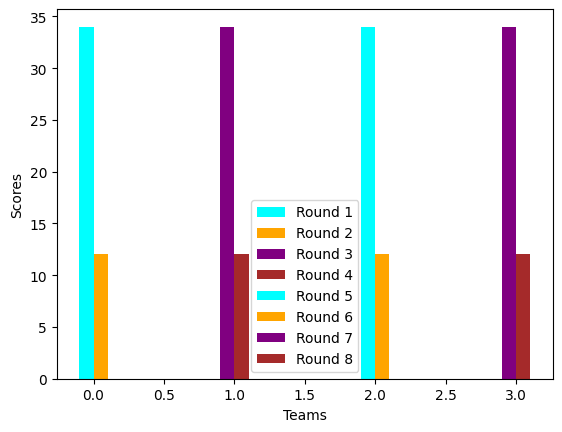

In [31]:
import matplotlib.pyplot as plt 
import numpy as np 
  
# create data 
x = 0 
y1 = [34]
y2 = [12]

x2 = 1 + x
y3 = [34]
y4 = [12]

x3 = 1 + x2
y5 = [34]
y6 = [12]

x4 = 1 + x3
y7 = [34]
y8 = [12]

# x5 = np.arange(1) + x4
# y1 = [34]
# y2 = [12]

# x6 = np.arange(1) + x5
# y1 = [34]
# y2 = [12]

# x7 = np.arange(1) + x6
# y1 = [34]
# y2 = [12]

width = 0.1
  
# plot data in grouped manner of bar type 
plt.bar(x-0.05, y1, width, color='cyan') 
plt.bar(x+0.05, y2, width, color='orange') 

plt.bar(x2-0.05, y3, width, color='purple') 
plt.bar(x2+0.05, y4, width, color='brown') 

plt.bar(x3-0.05, y5, width, color='cyan') 
plt.bar(x3+0.05, y6, width, color='orange') 

plt.bar(x4-0.05, y7, width, color='purple') 
plt.bar(x4+0.05, y8, width, color='brown') 

print(x4)
# plt.bar(x-0.2, y1, width, color='cyan') 
# plt.bar(x, y2, width, color='orange') 

plt.xlabel("Teams") 
plt.ylabel("Scores") 
plt.legend(["Round 1", "Round 2", "Round 3","Round 4", "Round 5", "Round 6","Round 7", "Round 8"]) 
plt.show() 

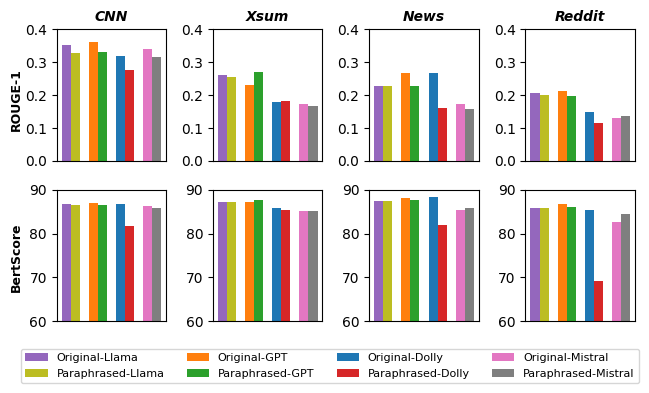

In [14]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

#Rouge1

x_labels=['Original-Llama', 'Paraphrased-Llama', 'Original-GPT', 'Paraphrased-GPT', 'Original-Dolly', 'Paraphrased-Dolly', 'Original-Mistral', 'Paraphrased-Mistral']
width=0.25
x=[0.25,0.5,1,1.25,1.75,2,2.5,2.75]

with open('rouge1-cnn.pkl', 'rb') as f:
    values=pkl.load(f)
    

axs[0,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,0].set_ylim(0,0.4)
axs[0,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])

with open('rouge1-xsum.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,1].set_ylim(0,0.4)
axs[0,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])

with open('rouge1-news.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,2].set_ylim(0,0.4)
axs[0,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

with open('rouge1-reddit.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,3].set_ylim(0,0.4)
axs[0,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])

#Bertscore

values=[]

values.append(data_llama_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_llama_cnn_csv['Bertscore'].iloc[0])
values.append(data_gpt_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_cnn_csv['Bertscore'].iloc[0])
values.append(data_dolly_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_cnn_csv['Bertscore'].iloc[0])
values.append(data_mistral_cnn_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_cnn_csv['Bertscore'].iloc[0])
axs[1,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=0.25)
axs[1,0].set_ylim(60,90)
#axs[1,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[1,0].get_xaxis().set_ticks([])


values=[]

values.append(data_llama_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_llama_xsum_csv['Bertscore'].iloc[0])
values.append(data_gpt_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_xsum_csv['Bertscore'].iloc[0])
values.append(data_dolly_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_xsum_csv['Bertscore'].iloc[0])
values.append(data_mistral_xsum_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_xsum_csv['Bertscore'].iloc[0])
axs[1,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=0.25)
axs[1,1].set_ylim(60,90)
#axs[1,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1,1].get_xaxis().set_ticks([])


values=[]
values.append(data_llama_news_csv['Bertscore'].iloc[0])
values.append(p_data_llama_news_csv['Bertscore'].iloc[0])
values.append(data_gpt_news_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_news_csv['Bertscore'].iloc[0])
values.append(data_dolly_news_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_news_csv['Bertscore'].iloc[0])
values.append(data_mistral_news_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_news_csv['Bertscore'].iloc[0])
axs[1,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=0.25)
axs[1,2].set_ylim(60,90)
#axs[1,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[1,2].get_xaxis().set_ticks([])

values=[]
values.append(data_llama_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_llama_reddit_csv['Bertscore'].iloc[0])
values.append(data_gpt_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_gpt_reddit_csv['Bertscore'].iloc[0])
values.append(data_dolly_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_dolly_reddit_csv['Bertscore'].iloc[0])
values.append(data_mistral_reddit_csv['Bertscore'].iloc[0])
values.append(p_data_mistral_reddit_csv['Bertscore'].iloc[0])

axs[1,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:grey'],label=x_labels,width=0.25)
axs[1,3].set_ylim(60,90)
#axs[1,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[1,3].get_xaxis().set_ticks([])


handles, labels = axs[1,3].get_legend_handles_labels()

fig.text(0, 0.70, 'ROUGE-1', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'Bertscore', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.legend(handles, labels,ncol=4, loc = 'lower center',bbox_to_anchor=(0, -0.125, 1, 1), bbox_transform=plt.gcf().transFigure, fontsize=8)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('../figures/final/Rouge1-Bertscore.png',bbox_inches='tight',dpi=400)
plt.show()

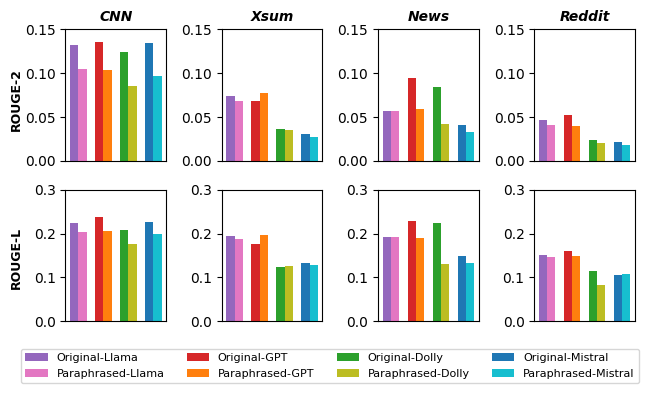

In [7]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

#Rouge2
x_labels=['Original-Llama', 'Paraphrased-Llama', 'Original-GPT', 'Paraphrased-GPT', 'Original-Dolly', 'Paraphrased-Dolly', 'Original-Mistral', 'Paraphrased-Mistral']
width=0.25
x=[0.25,0.5,1,1.25,1.75,2,2.5,2.75]

with open('rouge2-cnn.pkl', 'rb') as f:
    values=pkl.load(f)
    

axs[0,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,0].set_ylim(0,0.15)
axs[0,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])

with open('rouge2-xsum.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,1].set_ylim(0,0.15)
axs[0,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])

with open('rouge2-news.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,2].set_ylim(0,0.15)
axs[0,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

with open('rouge2-reddit.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,3].set_ylim(0,0.15)
axs[0,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])

#RougeL



with open('rougeL-cnn.pkl', 'rb') as f:
    values=pkl.load(f)
    

axs[1,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,0].set_ylim(0,0.3)
#axs[1,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[1,0].get_xaxis().set_ticks([])

with open('rougeL-xsum.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[1,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,1].set_ylim(0,0.3)
#axs[1,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1,1].get_xaxis().set_ticks([])

with open('rougeL-news.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[1,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,2].set_ylim(0,0.3)
#axs[1,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[1,2].get_xaxis().set_ticks([])

with open('rougeL-reddit.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[1,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,3].set_ylim(0,0.3)
#axs[1,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[1,3].get_xaxis().set_ticks([])




handles, labels = axs[1,3].get_legend_handles_labels()

fig.text(0, 0.70, 'ROUGE-2', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'ROUGE-L', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.legend(handles, labels,ncol=4, loc = 'lower center',bbox_to_anchor=(0, -0.125, 1, 1), bbox_transform=plt.gcf().transFigure, fontsize=8)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('../figures/final/Rouge2-RougeL.png',bbox_inches='tight',dpi=400)
plt.show()